# Text Classification Using Word Embeddings In IMDB Reviews Dataset (Subwords8k)

In [1]:
import tensorflow as tf
print(tf.__version__)

tf.enable_eager_execution() # For tensorflow 1.14. If you using tensorflow 2 you don't need to enable eager executions.

1.14.0


## Getting the dataset

```shell
 pip install -q tensorflow-datasets
```

In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## Data preprocessing and Tokenizing

In [3]:
# Initializing test and train data
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
# Encoding example
sample_string = 'Berkay Ezdemir'
tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is: ', tokenized_string)

original_string = tokenizer.decode(tokenized_string)
print('The original string: ', original_string)

Tokenized string is:  [1679, 1403, 47, 7998, 8051, 3707, 741]
The original string:  Berkay Ezdemir


In [7]:
for ts in tokenized_string:
    print('{} -----> {}'.format(ts, tokenizer.decode([ts])))

1679 -----> Ber
1403 -----> ka
47 -----> y 
7998 -----> E
8051 -----> z
3707 -----> dem
741 -----> ir


## Defining the neural network

In [9]:
embedding_dim = 64

model = tf.keras.Sequential({
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
})

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 12        
Total params: 523,917
Trainable params: 523,917
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 428s 17ms/step - loss: 4.1989 - acc: 0.5145 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 193s 8ms/step - loss: 4.1978 - acc: 0.5174 - val_loss: 4.1984 - val_acc: 0.5186
Epoch 3/10
25000/25000 [==============================] - 191s 8ms/step - loss: 4.1972 - acc: 0.5182 - val_loss: 4.1988 - val_acc: 0.5179
Epoch 4/10
25000/25000 [==============================] - 192s 8ms/step - loss: 4.1962 - acc: 0.5193 - val_loss: 4.1997 - val_acc: 0.5170
Epoch 5/10
25000/25000 [==============================] - 192s 8ms/step - loss: 4.1955 - acc: 0.5203 - val_loss: 4.2004 - val_acc: 0.5163
Epoch 6/10
25000/25000 [==============================] - 191s 8ms/step - loss: 4.1949 - acc: 0.5211 - val_loss: 4.2012 - val_acc: 0.5162
Epoch 7/10
25000/25000 [==============================] - 194s 8ms/step - loss: 4.1944 - acc: 0.5215 - val_loss: 4.2017 - val_acc: 0.5157
Epoch 8/10
25000/25000 [============

## Plotting the results

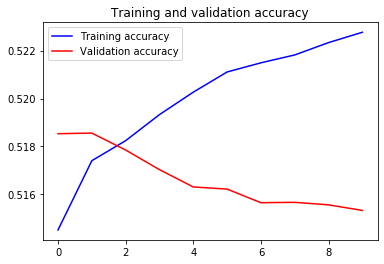

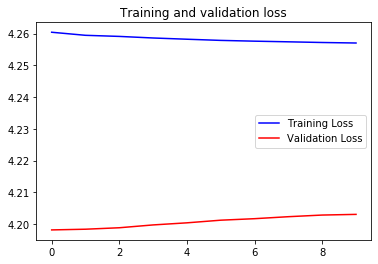

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()